### **Course Content**
##### Day 72 of 100 Days of Python
##### Project Name: Analyzing Programming Languages
##### Things I implemented: Pandas, Matplotlib

# Preliminary Data Exploration

In [1]:
import pandas as pd # import module

In [2]:
# Read the csv file and change the column names 
df = pd.read_csv(filepath_or_buffer='sample_data/programming_languages_survey.csv', header=0, names=['Date', 'Tag', 'Posts'])

In [3]:
df # make sure the columns are correct

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [4]:
df.head() # look at first 5 rows

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail() # look at last 5 rows

,Date,Tag,Posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [6]:
df.shape # count how many rows and columns / shape of the dataframe

(1991, 3)

In [7]:
df.count() # count number of entries in each column

Date     1991
Tag      1991
Posts    1991
dtype: int64

# Analysis of Programming Languages

In [8]:
df.groupby('Tag').count() # number of months per Programming Language

,Date,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [9]:
df.groupby('Tag').sum() # number of posts per tag

,Posts
Tag,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


# Data Cleaning: Working with timestamps

In [10]:
df['Date'] = pd.to_datetime(df['Date']) # convert all date from string to datetime

In [11]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


# Data Manipulation: Pivoting Dataframes

In [12]:
# CHALLENGE: Create a new dataframe called as reshaped_df, with programming languages as its columns, 
# date as its index, and posts as its value

reshaped_df = df.pivot(index = 'Date', columns='Tag', values='Posts')
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [13]:
reshaped_df.tail()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [14]:
reshaped_df.fillna(0, inplace=True)

In [15]:
reshaped_df.shape # shape of new dataframe

(145, 14)

In [16]:
reshaped_df.count() # number of entries per column

Tag
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [17]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

# Data Visualization with Matplotlib

In [18]:
import matplotlib.pyplot as plt # I can also put it at the top to make it more readable, but i don't really care right now

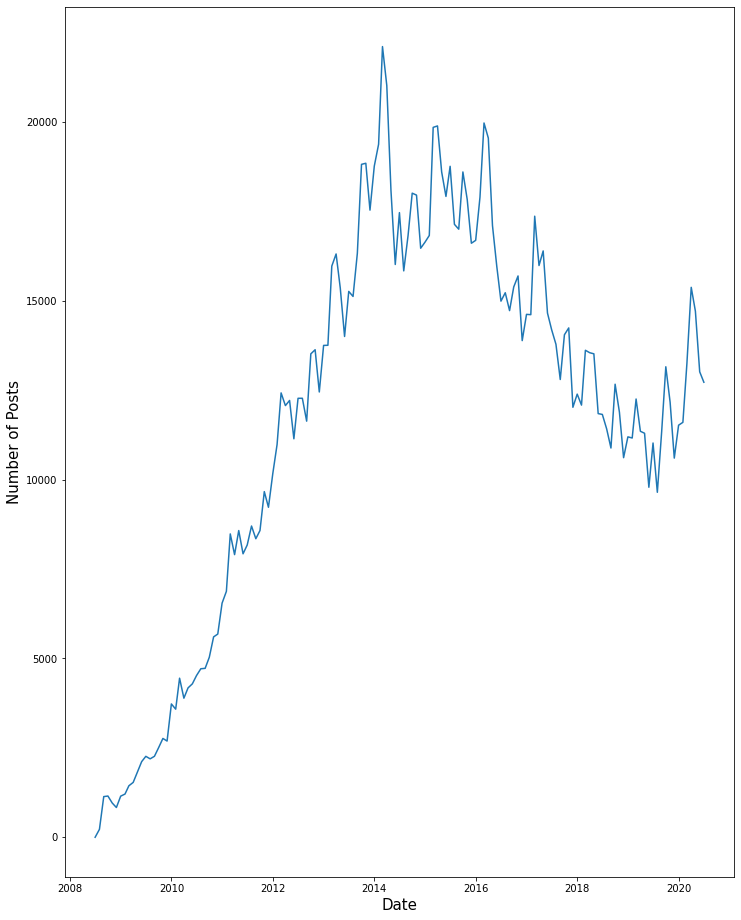

In [19]:
# Plotting a single programming language
plt.figure(figsize=(12,16))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Posts', fontsize=15)
plt.plot(reshaped_df.index, reshaped_df['java'])

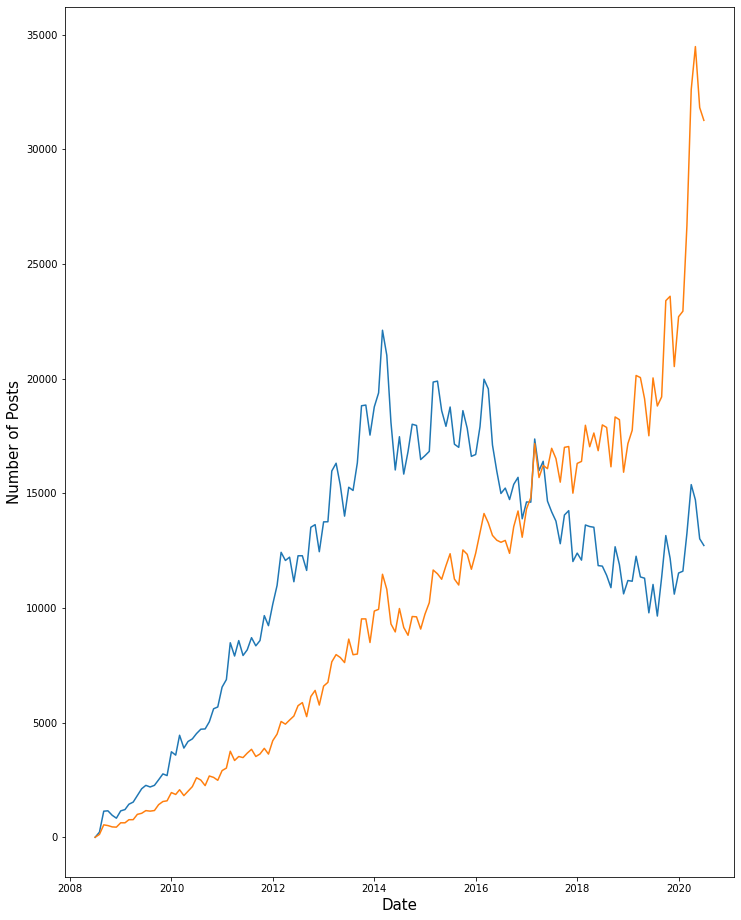

In [20]:
# Plotting Python and Java
plt.figure(figsize=(12,16))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Posts', fontsize=15)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

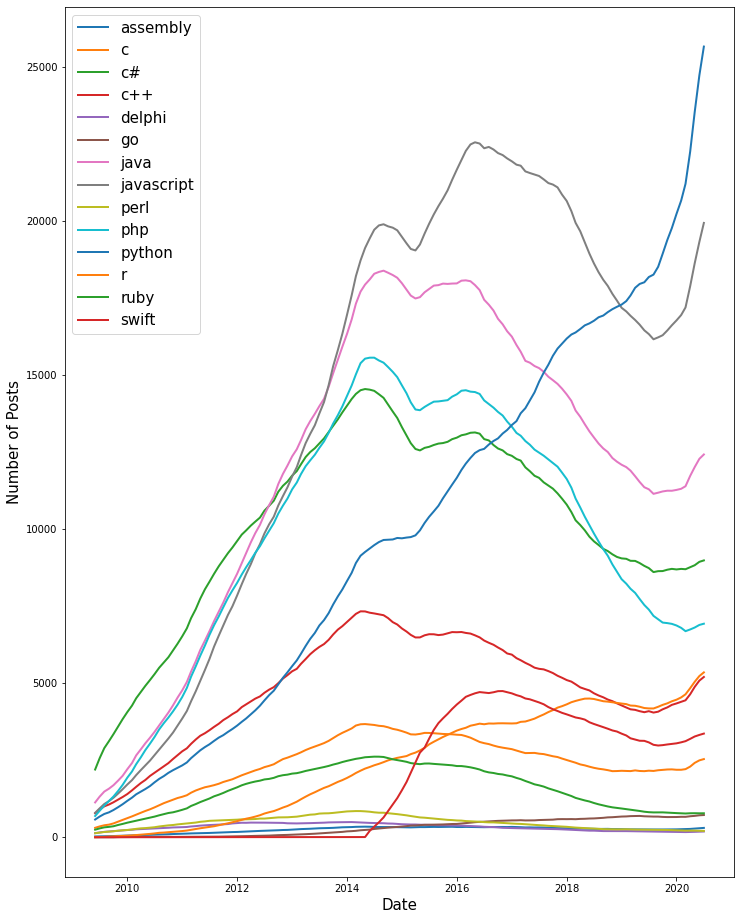

In [21]:
# Plot everything

# Make the plot smoother

roll_df = reshaped_df.rolling(window=12).mean()
# Make it into a dataframe composed of averages observations

plt.figure(figsize=(12,16)) # manipulate the figure size

# Add the labels
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Posts', fontsize=15)

# Add the plots
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=2, label=column)

# Create legend to explain which color is which
plt.legend(fontsize=15)